In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## **Introduction**

## **Methods & Results**

In [2]:
# loads data using read_csv function
players_origin <- read_csv("https://raw.githubusercontent.com/mcheng250/DSCI_Project_final_report/refs/heads/main/data/players.csv")
sessions_origin <- read_csv("https://raw.githubusercontent.com/mcheng250/DSCI_Project_final_report/refs/heads/main/data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Clean up the sessions.csv: mutate start_time and end_time to get session_length, use dmy_hm to turn start_time and 
# end_time into proper format, use difftime to calculate session length
# wrangle the session_length so we have avg_session_length. 
# Clean other columns so all we left is hashedEmail and avg_session_length while rounding the avg_session_length 
# decimal place so the data looks more clean
sessions_tidy <- sessions_origin |>
                    mutate(start_time = dmy_hm(start_time),
                           end_time = dmy_hm(end_time),
                           session_length = as.numeric(difftime(end_time, start_time, units = "mins"))) |>
                    group_by(hashedEmail) |>
                    summarize(avg_session_length = round(mean(session_length, na.rm = TRUE),2))
head(sessions_tidy)

hashedEmail,avg_session_length
<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,53.00
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30.00
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11.00
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,32.15
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,35.00
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,10.00


In [4]:
# Take out Age ,subscribe and hashedEmail from the player dataset to clean up players.csv
players_tidy <- players_origin |>
                    select(Age,subscribe,hashedEmail)  
head(players_tidy)

Age,subscribe,hashedEmail
<dbl>,<lgl>,<chr>
9,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
17,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9
17,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28
21,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5
21,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e
17,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977


In [5]:
# Merge two datasets to make the final clean data
tidy_data <- players_tidy |>
                left_join(sessions_tidy, by = "hashedEmail") |>
                drop_na(avg_session_length)
head(tidy_data)

Age,subscribe,hashedEmail,avg_session_length
<dbl>,<lgl>,<chr>,<dbl>
9,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,74.78
17,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,85.00
17,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,5.00
21,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,50.00
21,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,9.00
21,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,5.00


In [6]:
# summary of dataset
# The summary of mean value, min value and max value of avg_session_length
tidy_data |> summarize(mean_avg_session_length = round(mean(avg_session_length, na.rm = TRUE),2),
                       min_avg_session_length = round(min(avg_session_length, na.rm = TRUE),2),
                       max_avg_session_length = round(max(avg_session_length, na.rm = TRUE),2))
# The summary of mean value, min value and max value of Age
tidy_data |> summarize(mean_age = round(mean(Age, na.rm = TRUE),2),
                            min_age = round(min(Age, na.rm = TRUE),2),
                            max_age = round(max(Age, na.rm = TRUE),2))
# The summary of players whose subscribe is FALSE
tidy_data |> filter(subscribe == FALSE) |> 
                summarize(subscribe_FALSE = n())
# The summary of players whose subscribe is TRUE
tidy_data |> filter(subscribe == TRUE) |> 
                summarize(subscribe_TRUE = n())
# table of mean value summary
tidy_data |> summarize(mean_avg_session_length = round(mean(avg_session_length, na.rm = TRUE),2),
                                        mean_age = round(mean(Age, na.rm = TRUE),2)) |>
                              pivot_longer(cols = everything(),
                                           names_to = "variable", 
                                           values_to = "mean_value")

mean_avg_session_length,min_avg_session_length,max_avg_session_length
<dbl>,<dbl>,<dbl>
32.51,5,150.34


mean_age,min_age,max_age
<dbl>,<dbl>,<dbl>
21.59,9,58


subscribe_FALSE
<int>
32


subscribe_TRUE
<int>
93


variable,mean_value
<chr>,<dbl>
mean_avg_session_length,32.51
mean_age,21.59


In [7]:
#convert Subscribe data to factor
tidy_data <- tidy_data |>
  mutate(subscribe = factor(subscribe, levels = c(TRUE, FALSE), 
                          labels = c("Yes", "No"))) |>   
drop_na(Age, avg_session_length, subscribe)


tidy_data

Age,subscribe,hashedEmail,avg_session_length
<dbl>,<fct>,<chr>,<dbl>
9,Yes,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,74.78
17,Yes,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,85.00
17,No,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,5.00
⋮,⋮,⋮,⋮
22,No,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,21.00
57,No,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,5.00
17,No,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,29.83


In [8]:
set.seed(3456) 
# Randomly take 75% of the data for the training set, and 25% for testing set
data_split <- initial_split(tidy_data, prop = 0.75, strata = subscribe)  
train_data <- training(data_split)   
test_data <- testing(data_split)
# Scaling the variable and create recipe
knn_recipe <- recipe(subscribe ~ Age + avg_session_length, data = train_data) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
  neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [9]:
knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

In [10]:
# 10-fold cross-validation
train_vfolds <- vfold_cv(train_data, v = 10, strata = subscribe)

In [11]:
k_values <- tibble(neighbors = seq(1, 30))

# Tune to find best k
knn_results <- knn_workflow |>
  tune_grid(resamples = train_vfolds, grid = k_values) |>
  collect_metrics()

# Find k with highest accuracy
best_k <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1)

best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.7536111,10,0.01782041,Preprocessor1_Model07


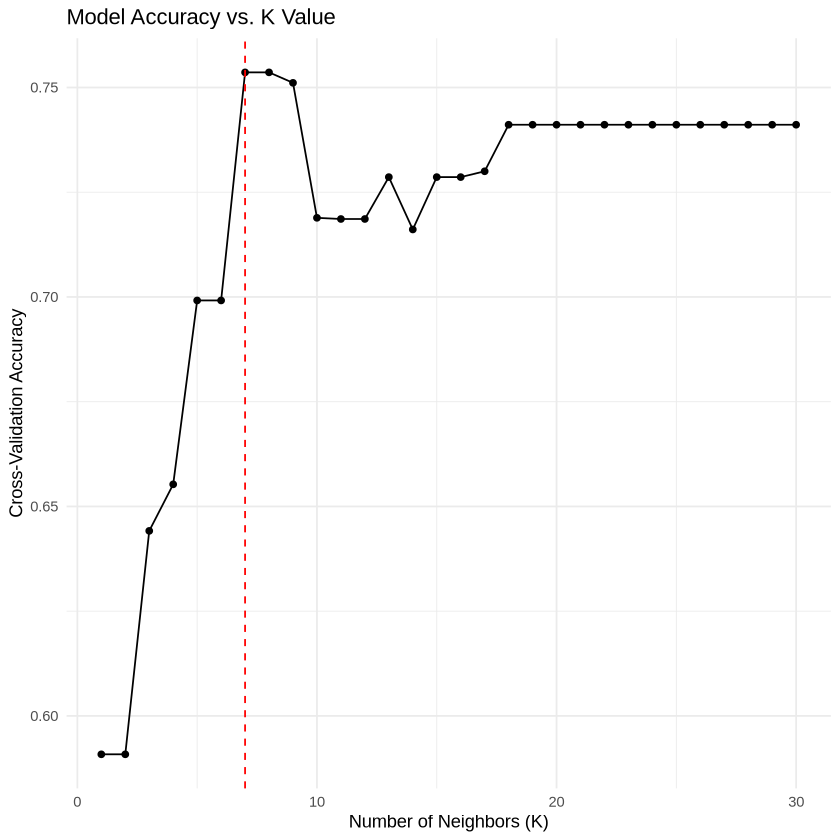

In [19]:
# Visualization of K tuning results
knn_results |>
  filter(.metric == "accuracy") |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  geom_vline(xintercept = best_k_value, linetype = "dashed", color = "red") +
  labs(x = "Number of Neighbors (K)",
       y = "Cross-Validation Accuracy",
       title = "Model Accuracy vs. K Value") +
  theme_minimal()

Based upon our calculations our most optimal K would be 7. 

In [14]:
best_k_value <- best_k |> pull(neighbors)

final_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_value) |>
  set_engine("kknn") |>
  set_mode("classification")

final_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(final_knn_spec)

final_fit <- final_workflow |>
  fit(data = train_data)

In [18]:
test_predictions <- final_fit |>
  predict(test_data) |>
  bind_cols(test_data)

head(test_predictions)

.pred_class,Age,subscribe,hashedEmail,avg_session_length
<fct>,<dbl>,<fct>,<chr>,<dbl>
Yes,21,Yes,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,50
Yes,21,No,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,5
No,47,Yes,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,13
⋮,⋮,⋮,⋮,⋮
Yes,21,No,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30
Yes,17,Yes,6b1cdc07fcc1f7ea09509341fd245dd34fdba386f14a493e9107c18604baedc9,11
Yes,22,No,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,21


In [21]:
test_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)

test_accuracy <- test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

test_precision <- test_predictions |>
  precision(truth = subscribe, estimate = .pred_class)

test_precision

          Truth
Prediction Yes No
       Yes  20  6
       No    3  2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7692308


In [20]:
cat("Best K:", best_k_value, "\n")
cat("Cross-validation accuracy:", round(best_k$mean, 3), "\n")
cat("Test set accuracy:", round(test_accuracy$.estimate, 3), "\n")

Best K: 7 
Cross-validation accuracy: 0.754 
Test set accuracy: 0.71 


## **Discussion**

## **References**